In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from nba_py.team import TeamYearOverYearSplits, TeamList
team_list = TeamList().info().head(30)

In [3]:
regular_stats = pd.read_csv('all_team_playoffs.csv')
advs_stats = pd.read_csv('all_team_playoffs_adv.csv')

In [4]:
regular_features = regular_stats[['GROUP_VALUE','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS','PLAYOFFS']]

In [5]:
playoff_reg = regular_features[regular_features['PLAYOFFS'] == 1].groupby(['GROUP_VALUE']).mean()
playoff_reg['YEAR'] = playoff_reg.index

In [6]:
reg_means = regular_features.groupby(['GROUP_VALUE']).mean()
reg_means['YEAR'] = reg_means.index

In [7]:
advs_features = advs_stats[['GROUP_VALUE','NET_RATING', 'AST_PCT', 'AST_TO',
       'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'PACE', 'PIE','PLAYOFFS']]
adv_means = advs_features.groupby(['GROUP_VALUE']).mean()
adv_means['YEAR'] = adv_means.index
playoff_adv = advs_features[advs_features['PLAYOFFS'] == 1].groupby(['GROUP_VALUE']).mean()
playoff_adv['YEAR'] = playoff_adv.index

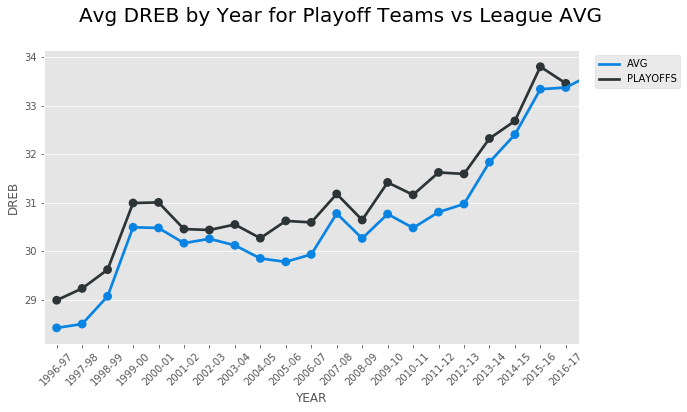

In [33]:
fig, ax = plt.subplots(figsize=(11,6))
sns.pointplot(x='YEAR',y='DREB', data=reg_means,color='#0984e3')
sns.pointplot(x='YEAR',y='DREB', data=playoff_reg, color='#2d3436')
leg = plt.legend(labels=['AVG','PLAYOFFS'], bbox_to_anchor=[1.2,1.0])
leg.legendHandles[0].set_color('#0984e3')
leg.legendHandles[1].set_color('#2d3436')
fig.suptitle('Avg DREB by Year for Playoff Teams vs League AVG', fontsize=20)
ticks = plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2,right=0.8)
fig.savefig('dreb_by_year')

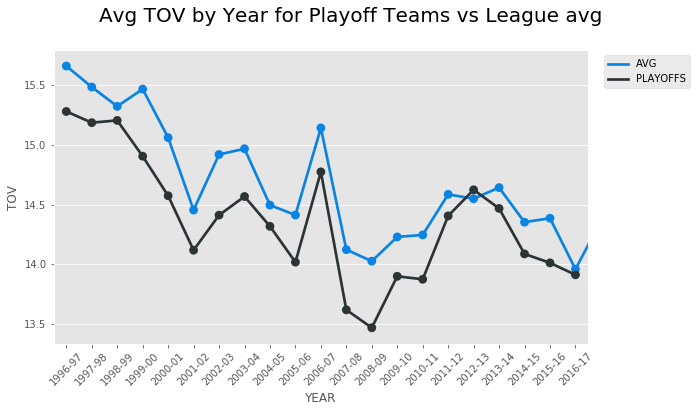

In [34]:
stat_to_analyze = 'TOV'
fig, ax = plt.subplots(figsize=(11,6))
sns.pointplot(x='YEAR',y=stat_to_analyze, data=reg_means,color='#0984e3')
sns.pointplot(x='YEAR',y=stat_to_analyze, data=playoff_reg, color='#2d3436')
leg = plt.legend(labels=['AVG','PLAYOFFS'], bbox_to_anchor=[1.2,1.0])
leg.legendHandles[0].set_color('#0984e3')
leg.legendHandles[1].set_color('#2d3436')
fig.suptitle('Avg %s by Year for Playoff Teams vs League avg' % (stat_to_analyze), fontsize=20)
ticks = plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2,right=0.8)
fig.savefig('%s_by_year' % stat_to_analyze)

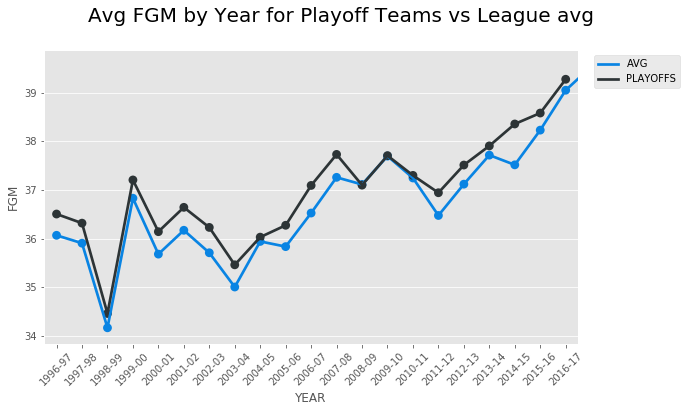

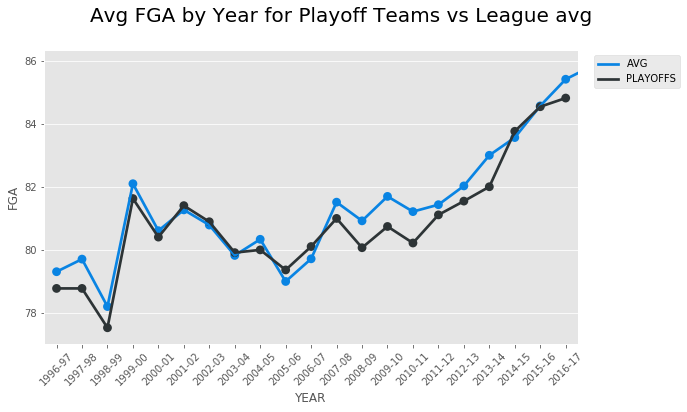

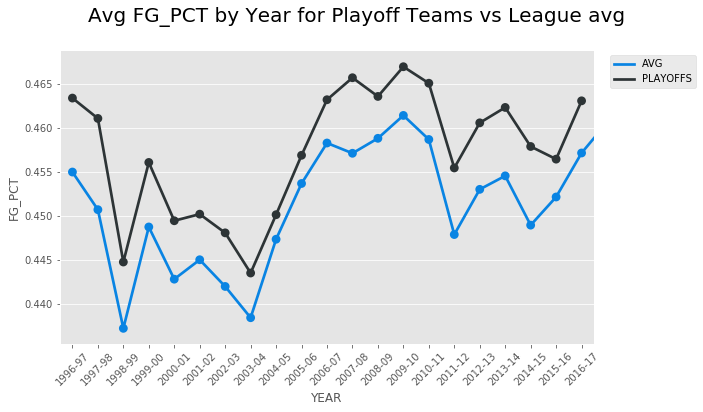

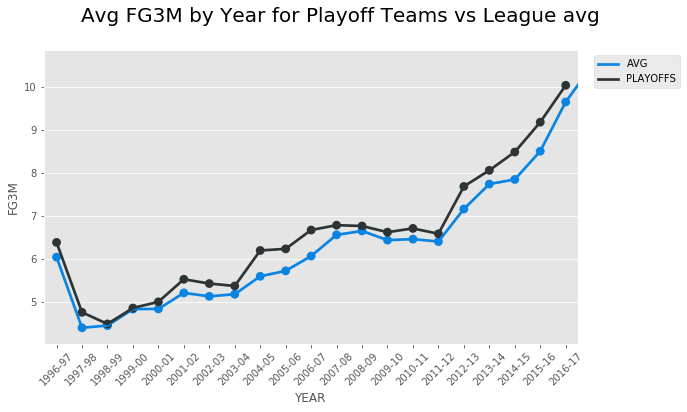

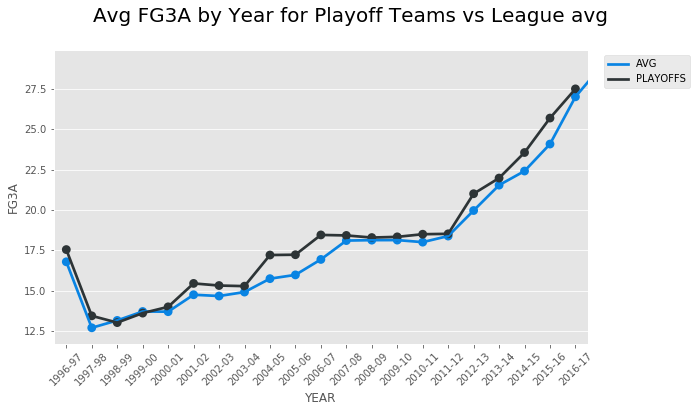

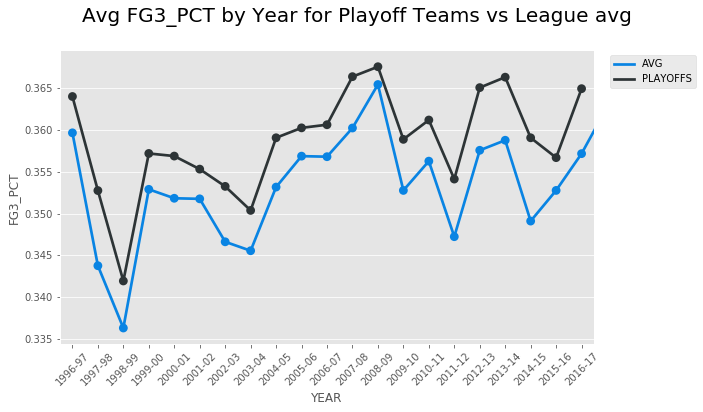

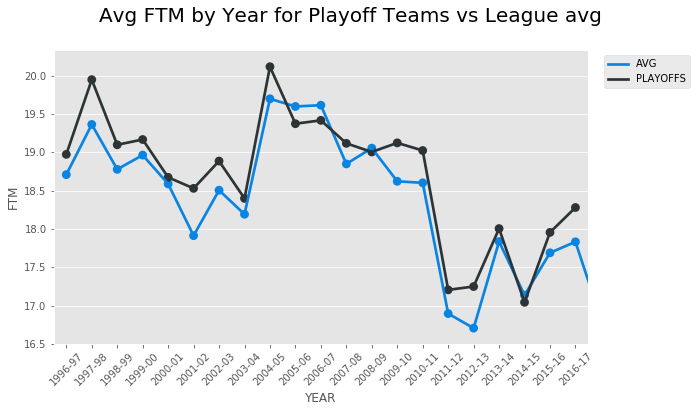

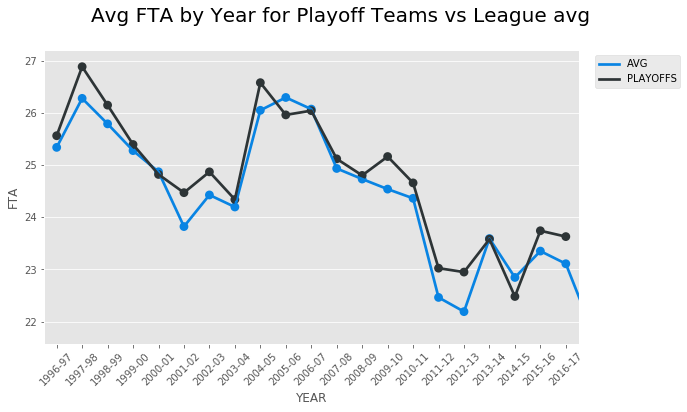

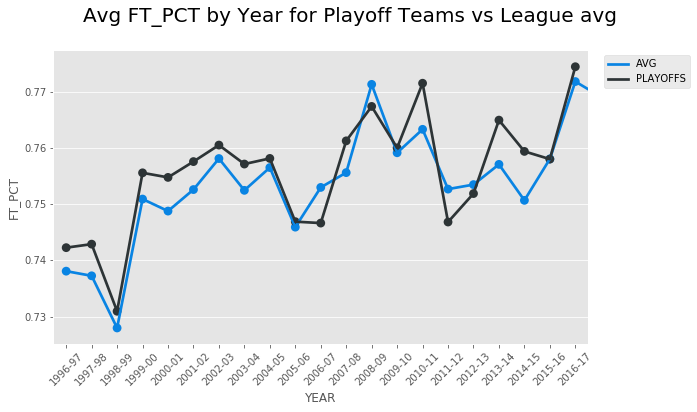

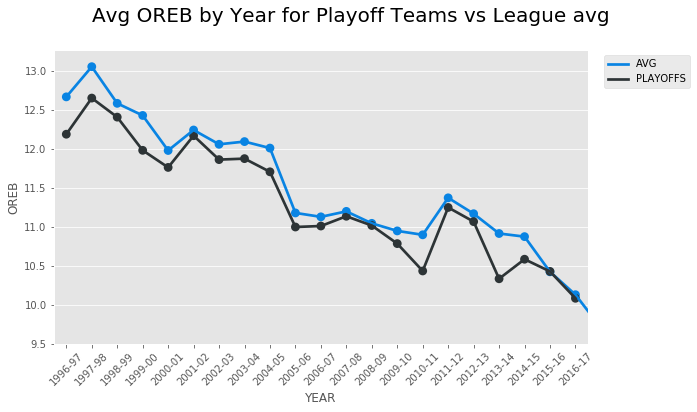

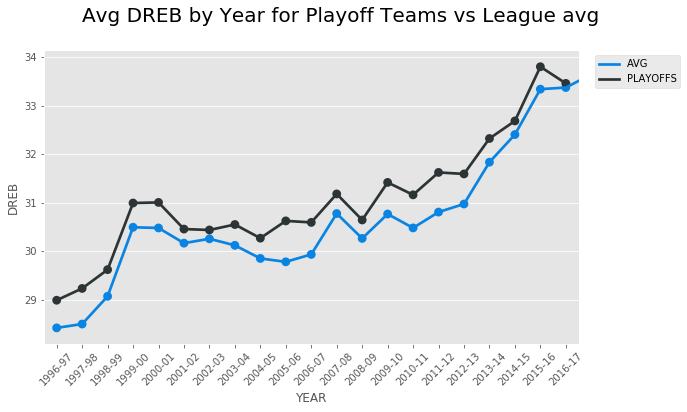

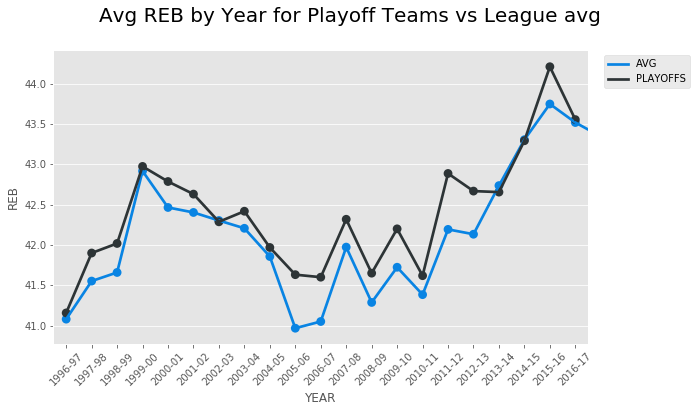

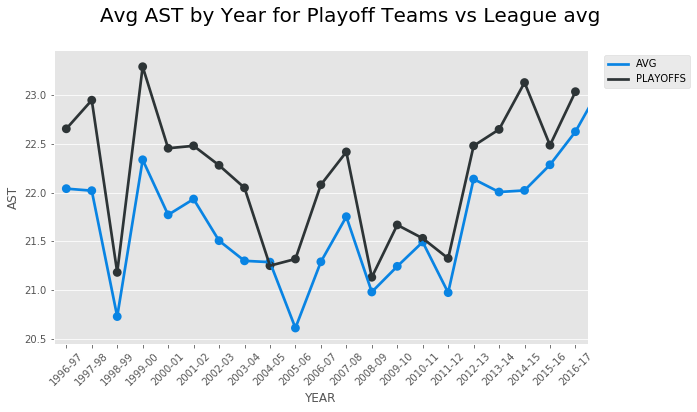

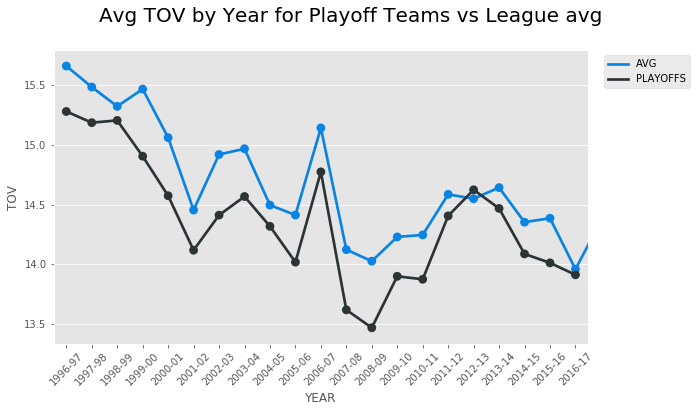

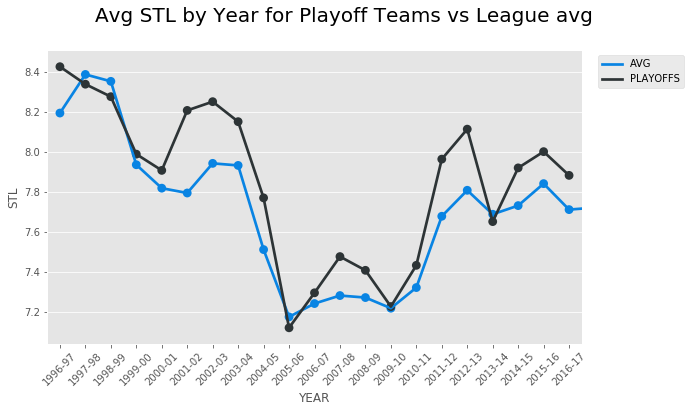

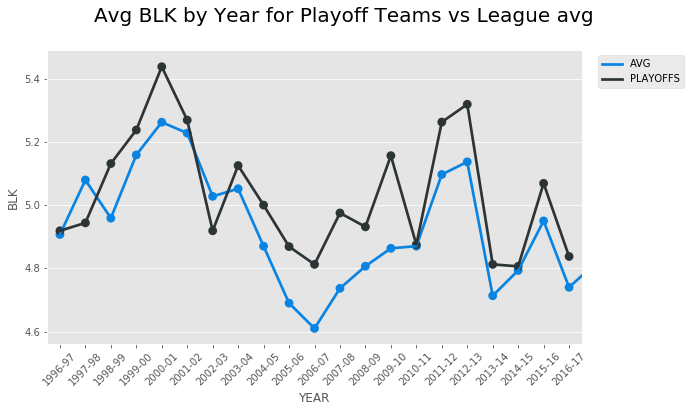

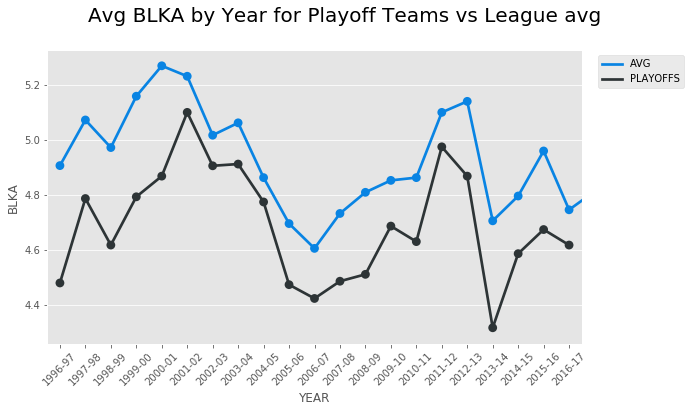

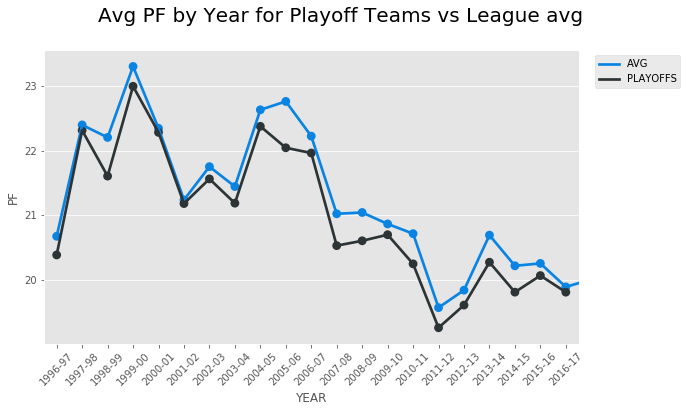

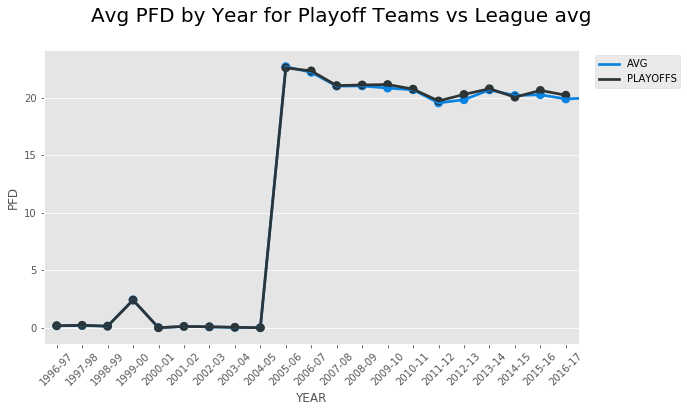

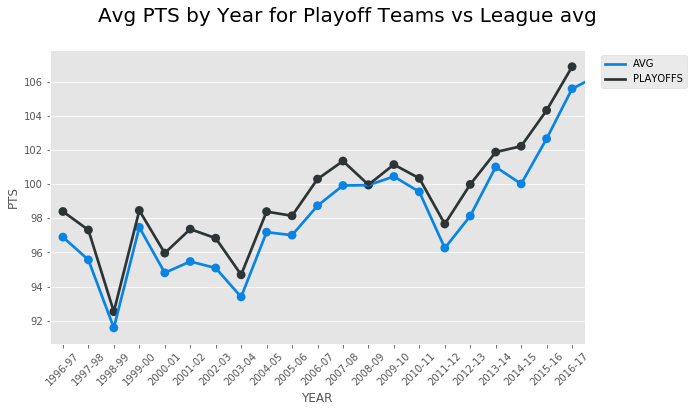

In [36]:
features_analyze = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS']
for feature in features_analyze:
    fig, ax = plt.subplots(figsize=(11,6))
    sns.pointplot(x='YEAR',y=feature, data=reg_means,color='#0984e3')
    sns.pointplot(x='YEAR',y=feature, data=playoff_reg, color='#2d3436')
    leg = plt.legend(labels=['AVG','PLAYOFFS'], bbox_to_anchor=[1.2,1.0])
    leg.legendHandles[0].set_color('#0984e3')
    leg.legendHandles[1].set_color('#2d3436')
    fig.suptitle('Avg %s by Year for Playoff Teams vs League avg' % (feature), fontsize=20)
    ticks = plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2,right=0.8)
    fig.savefig('%s_by_year' % feature)

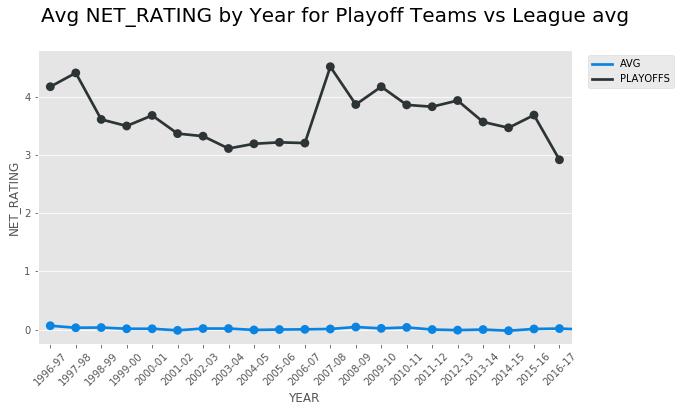

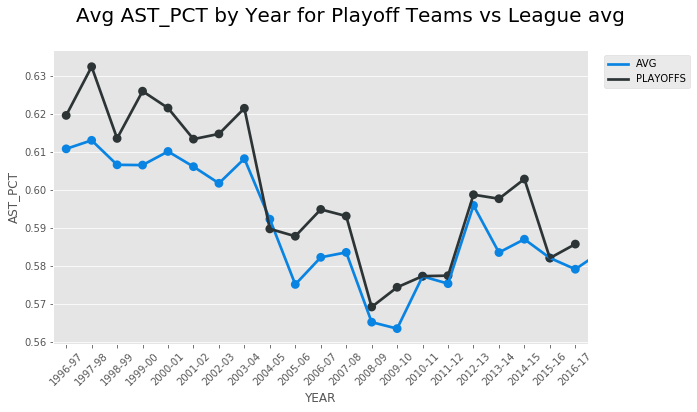

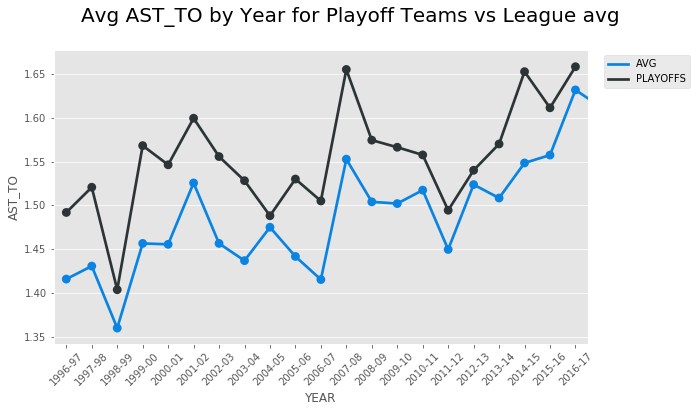

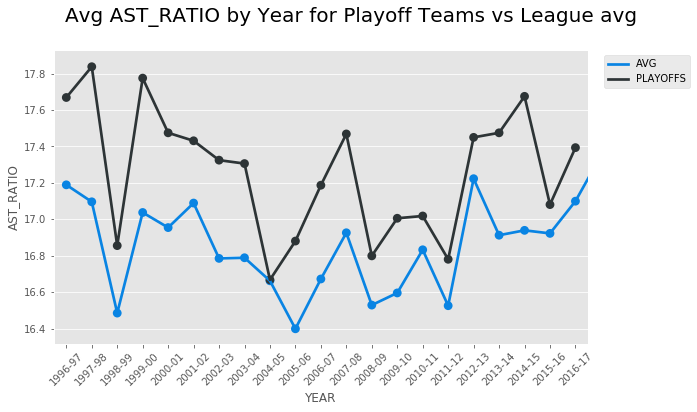

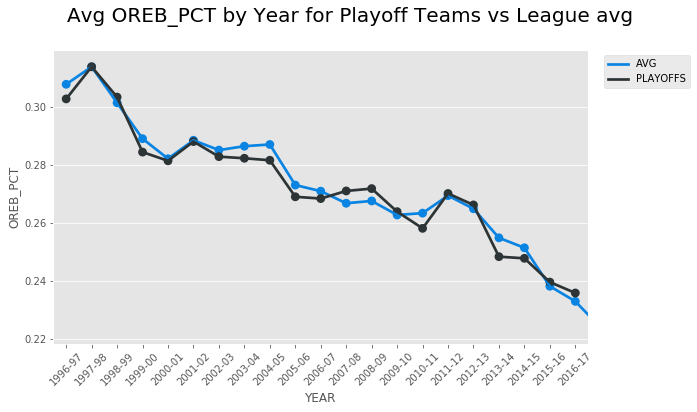

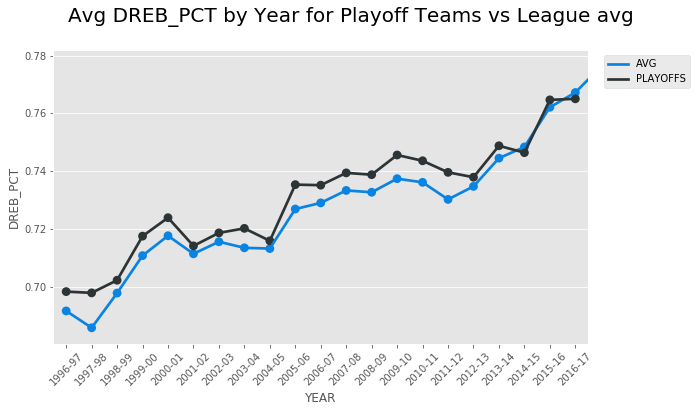

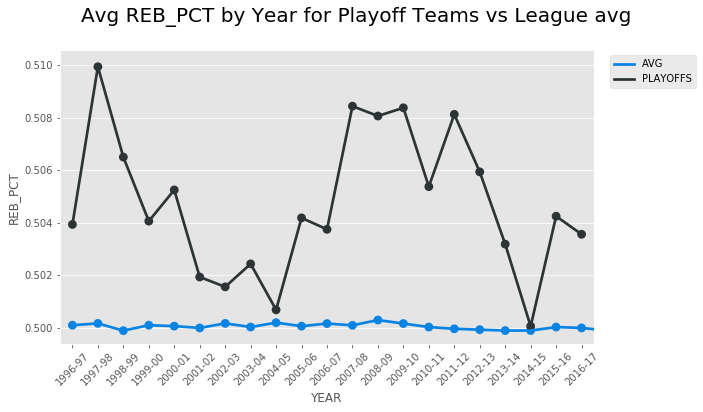

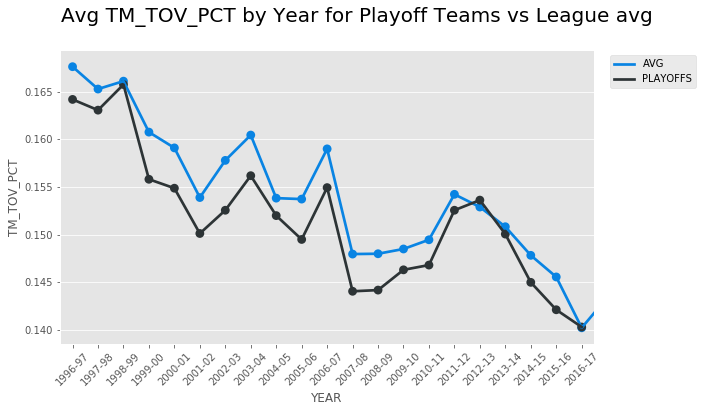

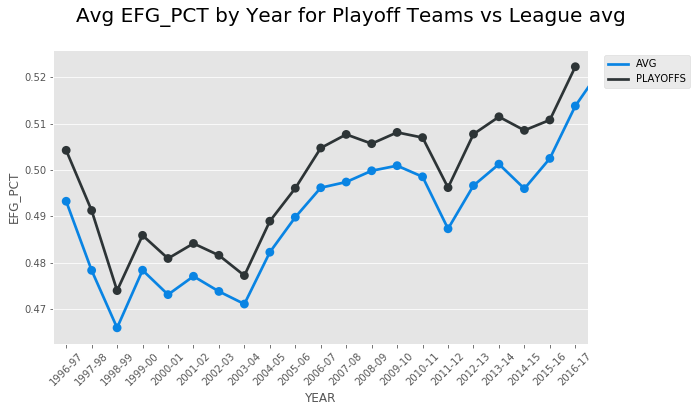

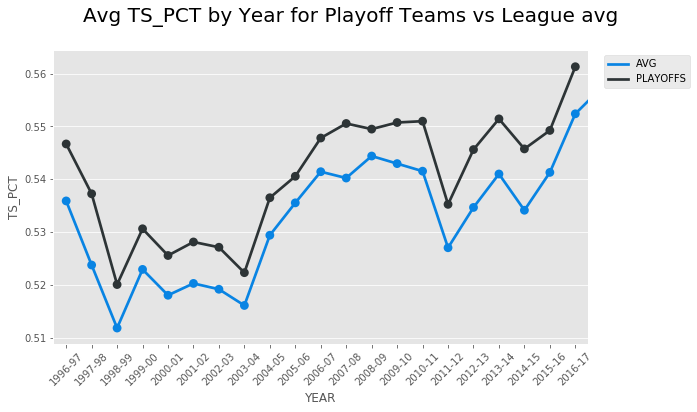

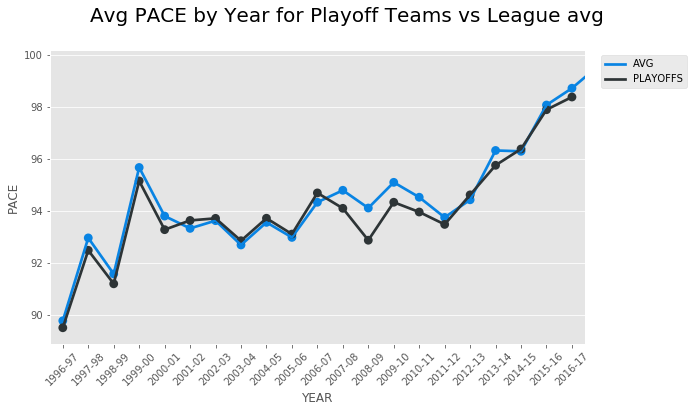

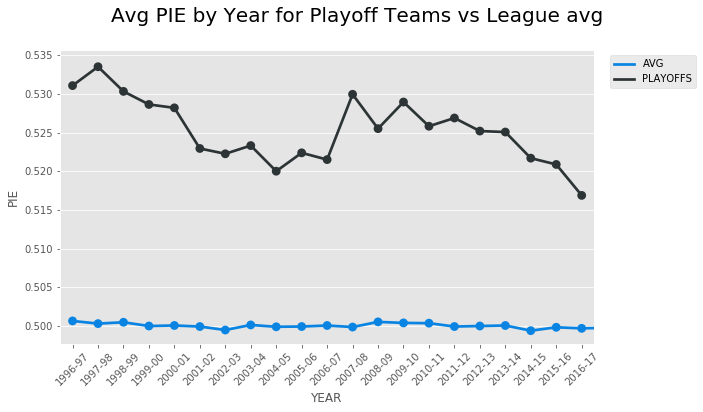

In [37]:
features_analyze = ['NET_RATING', 'AST_PCT', 'AST_TO',
       'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'PACE', 'PIE']
for feature in features_analyze:
    fig, ax = plt.subplots(figsize=(11,6))
    sns.pointplot(x='YEAR',y=feature, data=adv_means,color='#0984e3')
    sns.pointplot(x='YEAR',y=feature, data=playoff_adv, color='#2d3436')
    leg = plt.legend(labels=['AVG','PLAYOFFS'], bbox_to_anchor=[1.2,1.0])
    leg.legendHandles[0].set_color('#0984e3')
    leg.legendHandles[1].set_color('#2d3436')
    fig.suptitle('Avg %s by Year for Playoff Teams vs League avg' % (feature), fontsize=20)
    ticks = plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2,right=0.8)
    fig.savefig('%s_by_year' % feature)

In [31]:
all_stats = pd.concat([reg_means,adv_means], axis=1)
playoff_all_stats = pd.concat([playoff_reg,playoff_adv], axis=1)

(array([ 13.75,  14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,
         15.75,  16.  ]), <a list of 10 Text xticklabel objects>)

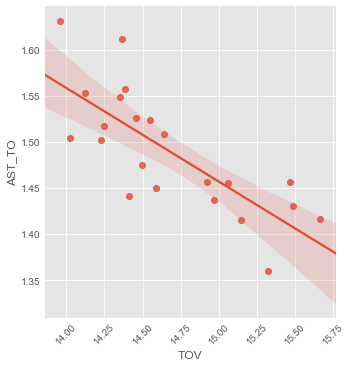

In [70]:
sns.lmplot(x='TOV',y='AST_TO', data=all_stats)
plt.xticks(rotation=45)